In [0]:
from __future__ import print_function
from gensim.models import KeyedVectors

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# Creating the model
#ko_model = KeyedVectors.load_word2vec_format('wiki.simple.vec')
#use google dirve path
en_simple_model = KeyedVectors.load_word2vec_format('/content/gdrive/My Drive/AI/wiki.simple.vec')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [4]:
# Getting the tokens 
words = []
for word in en_simple_model.vocab:
    words.append(word)

# Printing out number of tokens available
print("Number of Tokens: {}".format(len(words)))

# Printing out the dimension of a word vector 
print("Dimension of a word vector: {}".format(
    len(en_simple_model[words[0]])
))

# Print out the vector of a word 
print("Vector components of a word: {}".format(
    en_simple_model[words[0]]
))

print(words[0])

Number of Tokens: 111051
Dimension of a word vector: 300
Vector components of a word: [ 0.28922    -0.46075     0.35142    -0.41104     0.16421     0.17307
 -0.21562    -0.090636   -0.079495   -0.11149     0.030614   -0.0062959
  0.14929     0.17588     0.023571   -0.13192     0.24037    -0.023433
 -0.090424   -0.1205      0.15024    -0.04173     0.22556     0.0088108
  0.037523   -0.023573    0.088627   -0.21427     0.012018   -0.057337
 -0.029528    0.10135     0.1427     -0.20236    -0.046452   -0.16167
  0.43107    -0.017859   -0.15654     0.14826    -0.034114   -0.14649
 -0.091926   -0.16326    -0.08863    -0.057991   -0.12135     0.032937
  0.20307     0.20069     0.256      -0.10217    -0.22534    -0.1053
 -0.35453     0.047078    0.0064066   0.16062     0.30925     0.084114
 -0.10756     0.27985    -0.13681    -0.1818     -0.23974    -0.015328
  0.047659    0.18575    -0.05236     0.021459   -0.20396     0.16799
 -0.164      -0.10783     0.15601    -0.12507    -0.043054   -0.12

In [21]:
# Pick a word 
find_similar_to = 'love'
similar_words = []

# Finding out similar words [default= top 10]
for similar_word in en_simple_model.similar_by_word(find_similar_to):
    print("Word: {0}, Similarity: {1:.2f}".format(
        similar_word[0], similar_word[1]
    ))
    similar_words.append(similar_word)


Word: lover, Similarity: 0.64
Word: loves, Similarity: 0.63
Word: loveless, Similarity: 0.63
Word: lovegood, Similarity: 0.62
Word: lovesick, Similarity: 0.62
Word: loverboy, Similarity: 0.62
Word: lovewave, Similarity: 0.61
Word: loved, Similarity: 0.61
Word: lovejoy, Similarity: 0.61
Word: lovers, Similarity: 0.60


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


(


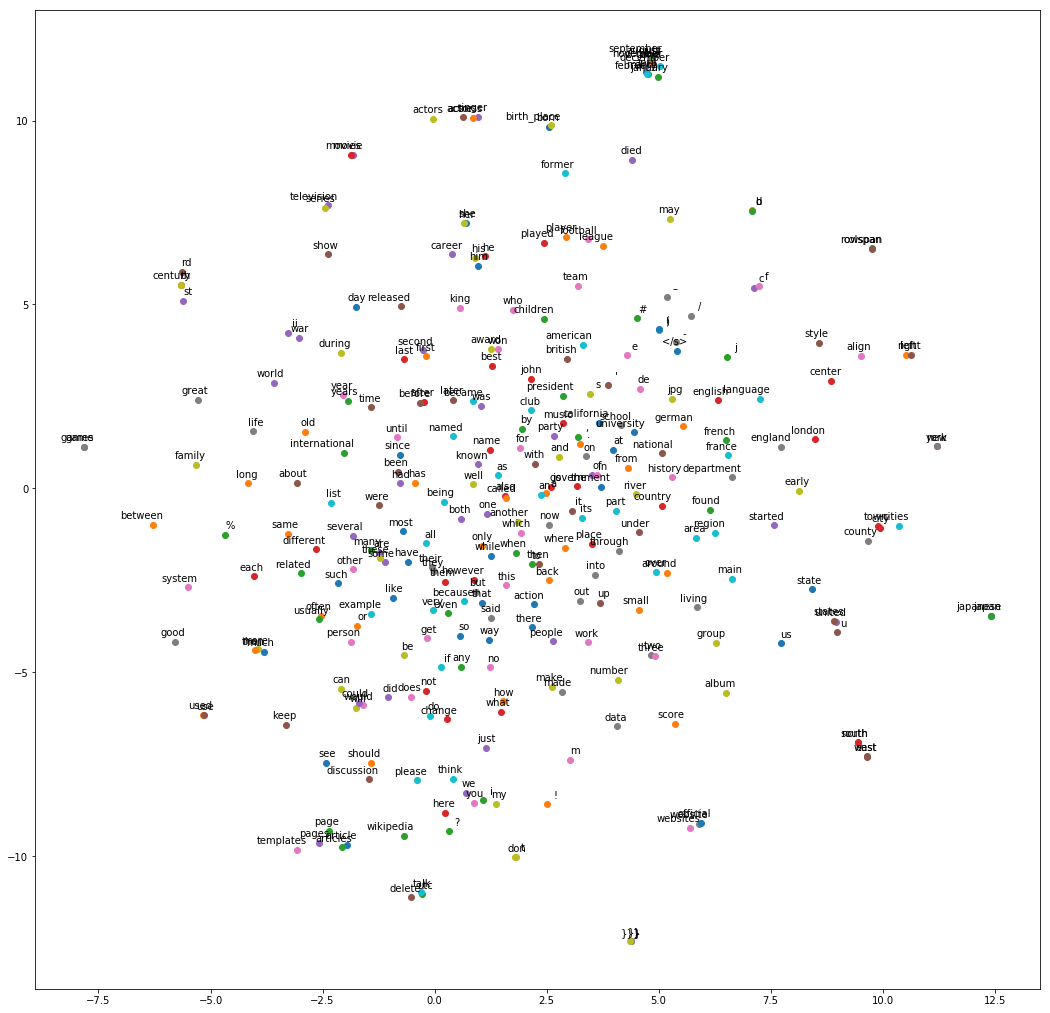

In [19]:
#wi.ko.vec에 저장된 88만여개 단어 중 선두 300개 단어를 2차원 상에 맵핑하면 다음과 같은 그림이 보여짐

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams

#font_name = font_manager.FontProperties(fname="/usr/share/fonts/truetype/MALGUN.TTF").get_name()
#rc('font', family=font_name)
#rcParams.update({'figure.autolayout': True})
#%matplotlib inline

# Limit number of tokens to be visualized
limit = 300
vector_dim = 300

# Getting tokens and vectors
words = []
embedding = np.array([])
i = 0
for word in en_simple_model.vocab:
    # Break the loop if limit exceeds 
    if i == limit: break
    if i == 10 : print(word)

    # Getting token 
    words.append(word)

    # Appending the vectors 
    embedding = np.append(embedding, en_simple_model[word])

    i += 1

# Reshaping the embedding vector 
embedding = embedding.reshape(limit, vector_dim)


def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(10, 4),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)


# Creating the tsne plot [Warning: will take time]
tsne = TSNE(perplexity=30.0, n_components=2, init='pca', n_iter=5000)

low_dim_embedding = tsne.fit_transform(embedding)

# Finally plotting and saving the fig 
plot_with_labels(low_dim_embedding, words)

loved
loves
lover
lovers
lovejoy
loveless
lovegood
loverboy
lovewave
lovesick


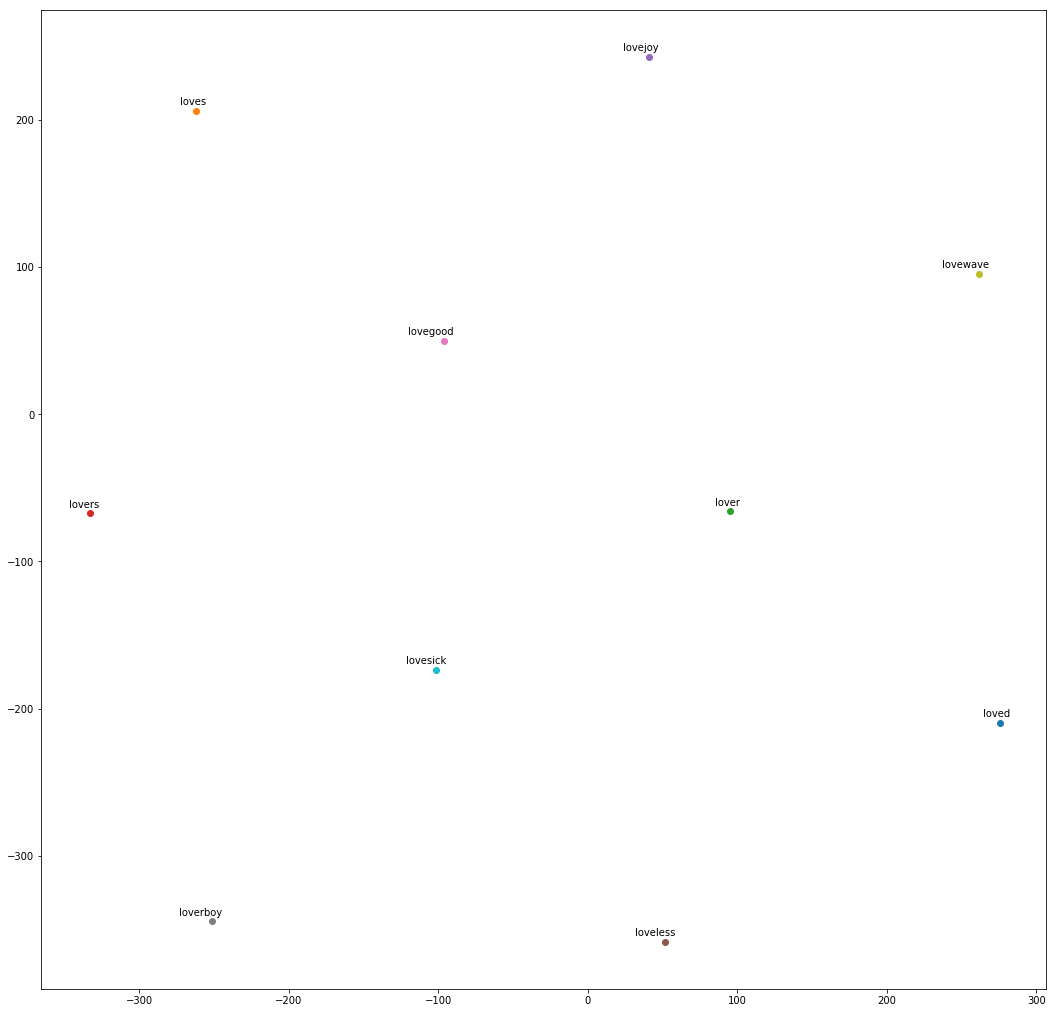

In [27]:
# love단어만 2차원 공간에 표시

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Limit number of tokens to be visualized
limit = len(similar_words)
vector_dim = 300

# Getting tokens and vectors
words = []
embedding = np.array([])
i = 0
for word in en_simple_model.vocab:
    # Break the loop if limit exceeds 
    if i == limit: break
    for sWord in similar_words :
      if sWord[0] == word:
        print(word)
        i += 1
        
        # Getting token 
        words.append(word)
        
        # Appending the vectors 
        embedding = np.append(embedding, en_simple_model[word])
    

# Reshaping the embedding vector 
embedding = embedding.reshape(limit, vector_dim)


def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(10, 4),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)


# Creating the tsne plot [Warning: will take time]
tsne = TSNE(perplexity=30.0, n_components=2, init='pca', n_iter=5000)

low_dim_embedding = tsne.fit_transform(embedding)

# Finally plotting and saving the fig 
plot_with_labels(low_dim_embedding, words)